--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   appointment_id     12000 non-null  object 
 1   customer_id        12000 non-null  object 
 2   booking_date       12000 non-null  object 
 3   booking_time       12000 non-null  object 
 4   booking_datetime   12000 non-null  object 
 5   created_at         12000 non-null  object 
 6   service_type       12000 non-null  object 
 7   staff_assigned     12000 non-null  object 
 8   duration_mins      12000 non-null  int64  
 9   status             12000 non-null  object 
 10  reschedule_count   12000 non-null  int64  
 11  lead_time_minutes  12000 non-null  int64  
 12  holiday_flag       12000 non-null  int64  
 13  weather            12000 non-null  object 
 14  channel            12000 non-null  object 
 15  price              12000 non-null  float64
 

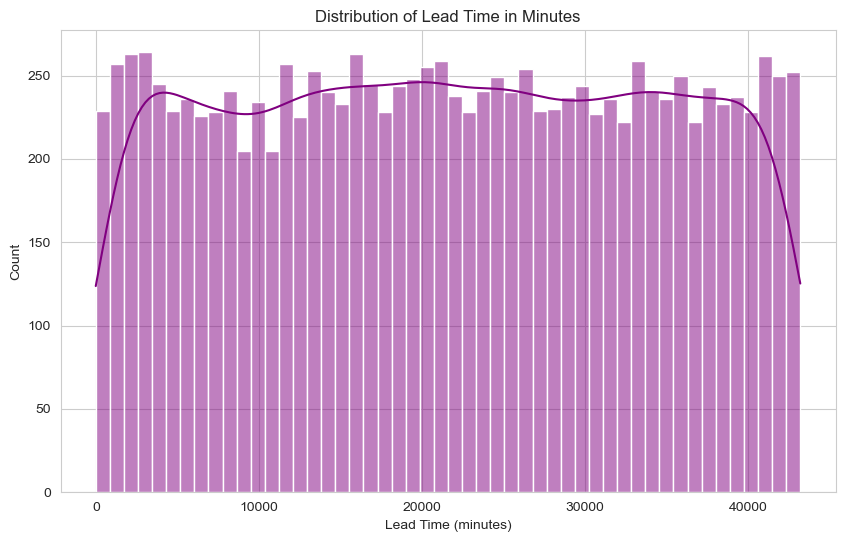

C:\Users\Hp\AppData\Local\Temp\ipykernel_6940\3354691625.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reschedule_count', data=raw_data, palette='viridis')


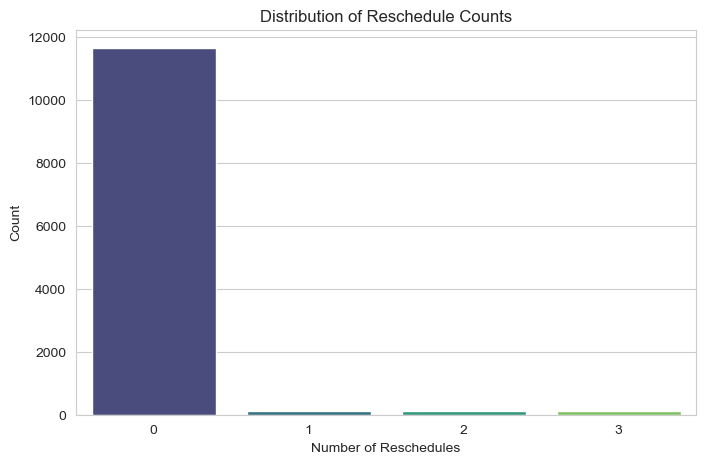

C:\Users\Hp\AppData\Local\Temp\ipykernel_6940\3354691625.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='service_type', data=raw_data, palette='Set2', order=raw_data['service_type'].value_counts().index)


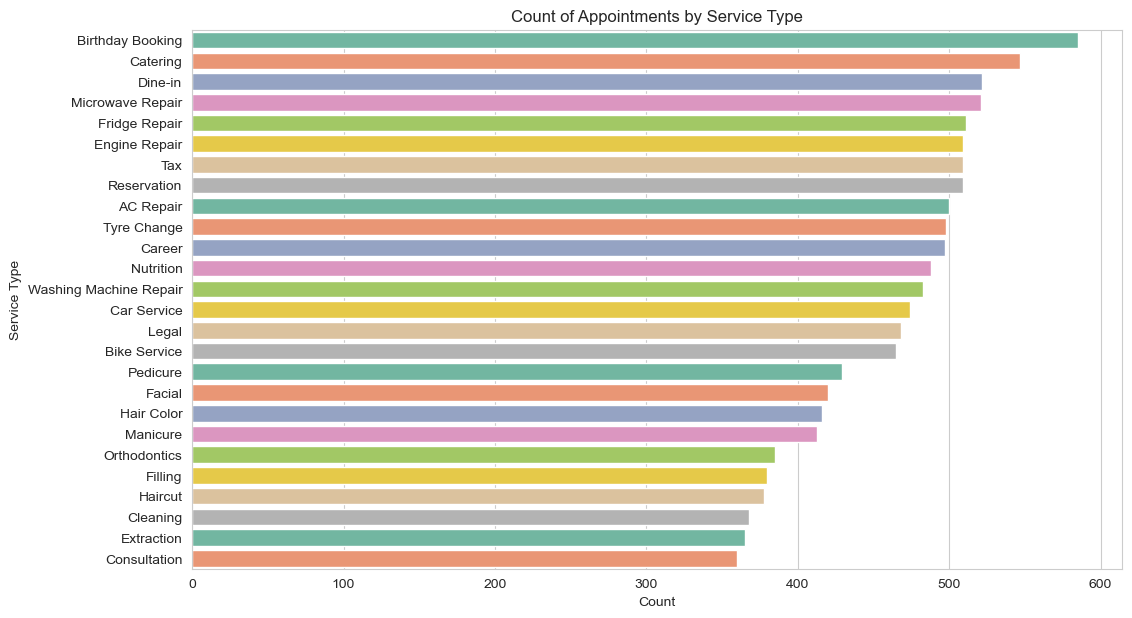

C:\Users\Hp\AppData\Local\Temp\ipykernel_6940\3354691625.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='channel', data=raw_data, palette='coolwarm')


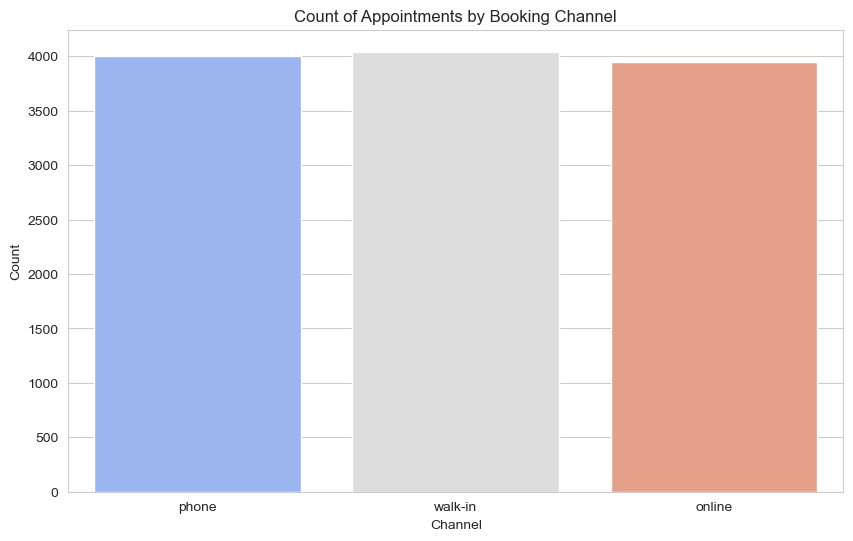

C:\Users\Hp\AppData\Local\Temp\ipykernel_6940\3354691625.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='holiday_flag', data=raw_data, palette='pastel')


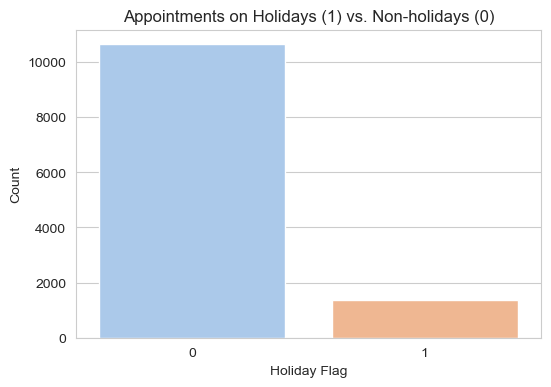

C:\Users\Hp\AppData\Local\Temp\ipykernel_6940\3354691625.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=raw_data, palette='Spectral')


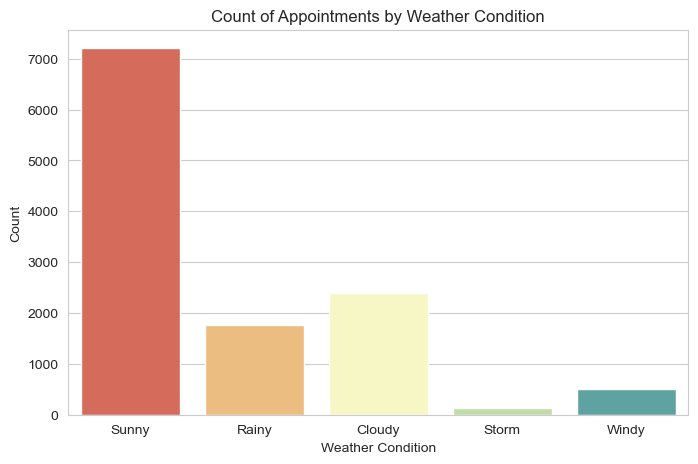

C:\Users\Hp\AppData\Local\Temp\ipykernel_6940\3354691625.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='tags', data=raw_data, palette='Paired', order=raw_data['tags'].value_counts().index)


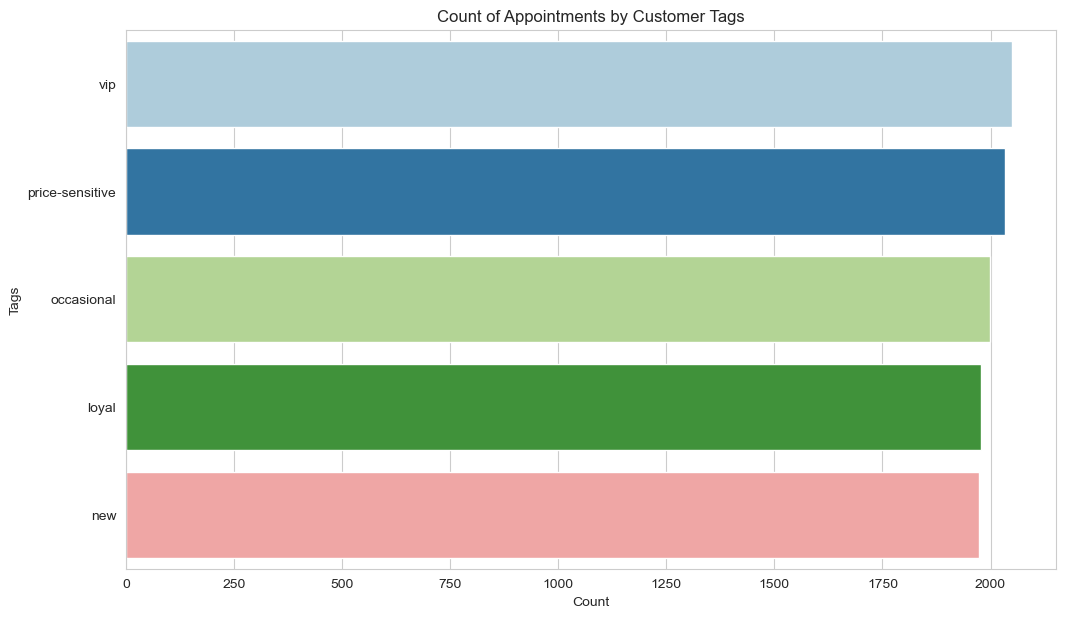

C:\Users\Hp\AppData\Local\Temp\ipykernel_6940\3354691625.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y='lead_time_minutes', data=raw_data, palette='husl')


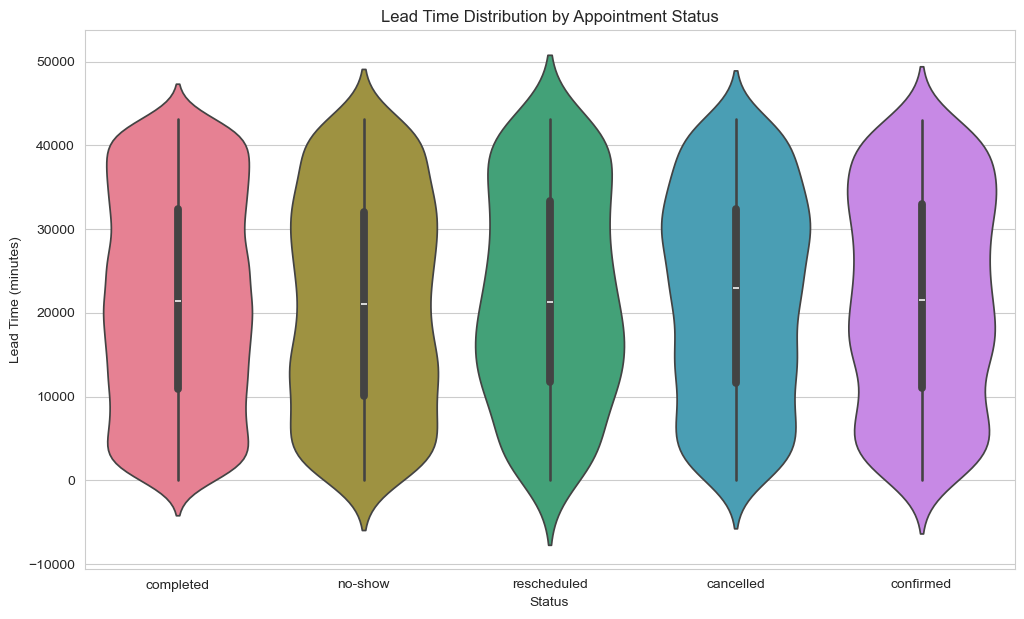

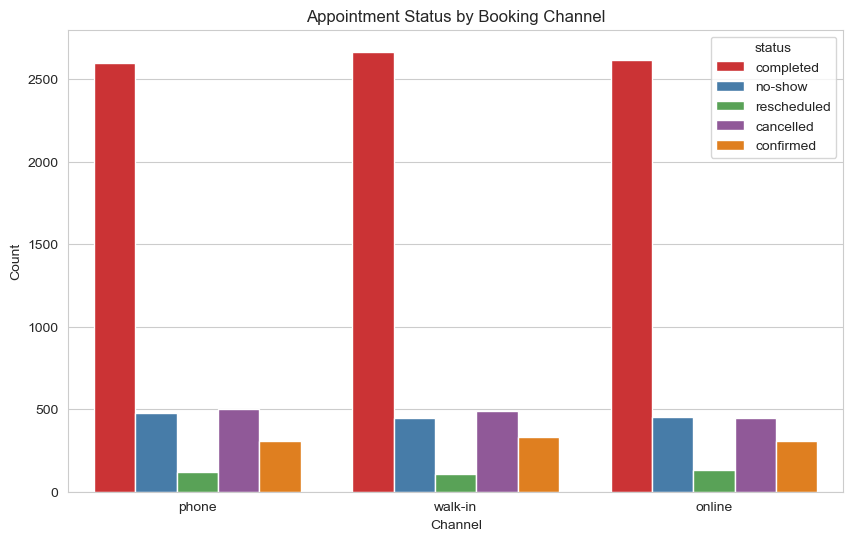

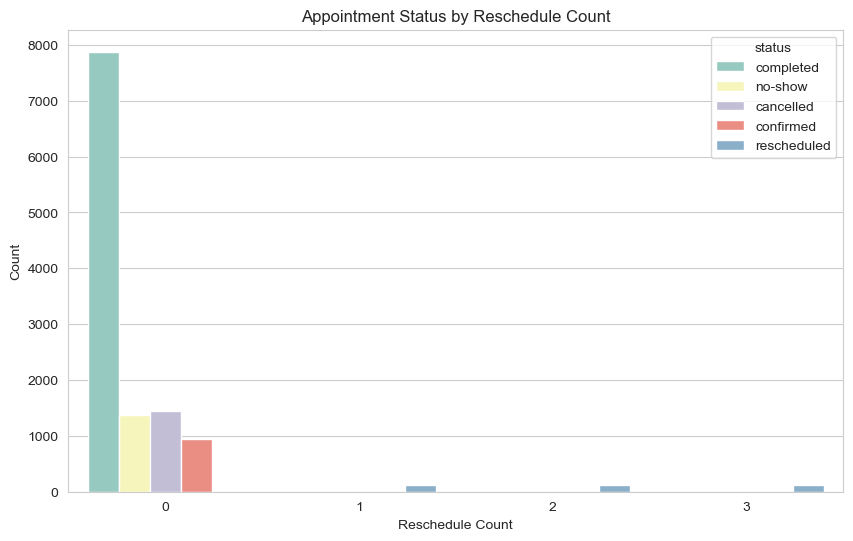


--- Analysis Complete ---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style('whitegrid')
%matplotlib inline

# Create a sample DataFrame based on the user's data
# In a real scenario, you would load this from a CSV file.
# --- 1. Load dataset ---
try:
    df = pd.read_excel("new.xlsx")
except FileNotFoundError:
    print("Error: The file 'new.xlsx' was not found.")
    exit()

# Drop unnecessary columns
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Copy original dataframe
data = df.copy()

# In a real scenario, you'd use:
# raw_data = pd.read_csv('your_dataset_name.csv')
raw_data = pd.DataFrame(data)

# --- Data Cleaning and Feature Engineering ---

print("--- Initial Data Info ---")
raw_data.info()

# Convert datetime columns
raw_data['booking_datetime'] = pd.to_datetime(raw_data['booking_datetime'])
raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])

# Check for data integrity (e.g., negative lead_time_minutes)
# While the sample data has no negatives, it's a good practice to handle them.
# Drop rows where lead_time is negative (appointment booked after it happened)
# This is equivalent to your `waiting_time` check.
raw_data.drop(raw_data[raw_data['lead_time_minutes'] < 0].index, inplace=True)

# Bin `lead_time_minutes` into categories for easier analysis
bins = [0, 60, 1440, 10080, raw_data['lead_time_minutes'].max()]
labels = ['<1hr', '1hr-1day', '1day-1wk', '>1wk']
raw_data['lead_time_category'] = pd.cut(raw_data['lead_time_minutes'], bins=bins, labels=labels, right=False)

# Map string-based features to numerical categories
# This is useful for future modeling, but for plotting we can keep strings.
raw_data['channel_enc'] = raw_data['channel'].astype('category').cat.codes
raw_data['service_type_enc'] = raw_data['service_type'].astype('category').cat.codes

# --- Exploratory Data Analysis (EDA) and Visualization ---

print("\n--- EDA on Key Features ---")

# 1. Distribution of lead_time_minutes
plt.figure(figsize=(10, 6))
sns.histplot(raw_data['lead_time_minutes'], bins=50, kde=True, color='purple')
plt.title('Distribution of Lead Time in Minutes')
plt.xlabel('Lead Time (minutes)')
plt.ylabel('Count')
plt.show()

# 2. Reschedule Count
plt.figure(figsize=(8, 5))
sns.countplot(x='reschedule_count', data=raw_data, palette='viridis')
plt.title('Distribution of Reschedule Counts')
plt.xlabel('Number of Reschedules')
plt.ylabel('Count')
plt.show()

# 3. Service Type
plt.figure(figsize=(12, 7))
sns.countplot(y='service_type', data=raw_data, palette='Set2', order=raw_data['service_type'].value_counts().index)
plt.title('Count of Appointments by Service Type')
plt.xlabel('Count')
plt.ylabel('Service Type')
plt.show()

# 4. Channel
plt.figure(figsize=(10, 6))
sns.countplot(x='channel', data=raw_data, palette='coolwarm')
plt.title('Count of Appointments by Booking Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

# 5. Holiday Flag
plt.figure(figsize=(6, 4))
sns.countplot(x='holiday_flag', data=raw_data, palette='pastel')
plt.title('Appointments on Holidays (1) vs. Non-holidays (0)')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()

# 6. Weather
plt.figure(figsize=(8, 5))
sns.countplot(x='weather', data=raw_data, palette='Spectral')
plt.title('Count of Appointments by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

# 7. Tags
plt.figure(figsize=(12, 7))
sns.countplot(y='tags', data=raw_data, palette='Paired', order=raw_data['tags'].value_counts().index)
plt.title('Count of Appointments by Customer Tags')
plt.xlabel('Count')
plt.ylabel('Tags')
plt.show()

# --- Relationships between features (similar to your previous notebook) ---

# Relationship between lead time and status (assuming 'completed' vs 'no-show' or 'canceled')
# The sample data only has 'completed', so this is for demonstration
# A real dataset would have different statuses like 'canceled', 'no-show', etc.
if len(raw_data['status'].unique()) > 1:
    plt.figure(figsize=(12, 7))
    sns.violinplot(x='status', y='lead_time_minutes', data=raw_data, palette='husl')
    plt.title('Lead Time Distribution by Appointment Status')
    plt.xlabel('Status')
    plt.ylabel('Lead Time (minutes)')
    plt.show()

# Relationship between channel and status
if len(raw_data['status'].unique()) > 1:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='channel', hue='status', data=raw_data, palette='Set1')
    plt.title('Appointment Status by Booking Channel')
    plt.xlabel('Channel')
    plt.ylabel('Count')
    plt.show()

# Relationship between reschedule count and status
if len(raw_data['status'].unique()) > 1:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='reschedule_count', hue='status', data=raw_data, palette='Set3')
    plt.title('Appointment Status by Reschedule Count')
    plt.xlabel('Reschedule Count')
    plt.ylabel('Count')
    plt.show()

print("\n--- Analysis Complete ---")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical features
categorical_cols = ['channel', 'service_type', 'weather', 'tags']  # add more if needed
for col in categorical_cols:
    if col in raw_data.columns:
        raw_data[col + '_enc'] = raw_data[col].astype('category').cat.codes

# Update features to include encoded columns
features = ['lead_time_minutes', 'reschedule_count', 'channel_enc', 'service_type_enc', 
            'holiday_flag', 'weather_enc']

if 'tags_enc' in raw_data.columns:
    features.append('tags_enc')

# Target
raw_data[target] = raw_data[target].astype('category')
raw_data['status_enc'] = raw_data[target].cat.codes

X = raw_data[features]
y = raw_data['status_enc']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Test Accuracy: 0.6671

Classification Report:

              precision    recall  f1-score   support

   cancelled       0.06      0.01      0.01       288
   completed       0.68      0.97      0.80      1575
   confirmed       0.00      0.00      0.00       189
     no-show       0.14      0.01      0.03       276
 rescheduled       1.00      1.00      1.00        72

    accuracy                           0.67      2400
   macro avg       0.38      0.40      0.37      2400
weighted avg       0.50      0.67      0.56      2400



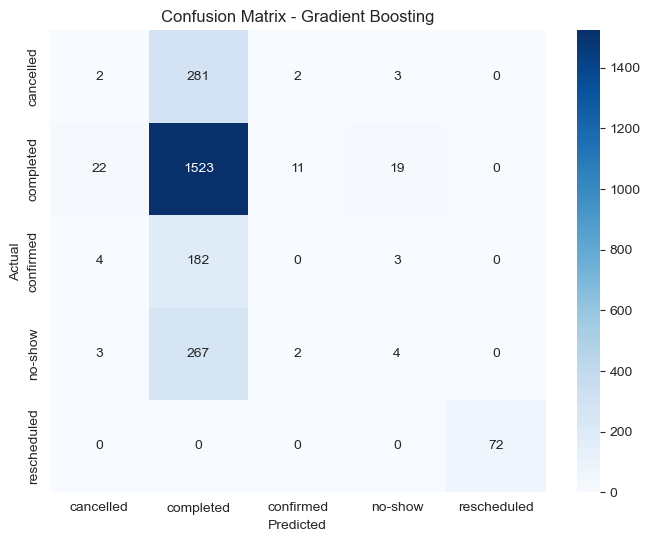

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Train Gradient Boosting Model ---
gb_model = GradientBoostingClassifier(
    n_estimators=200,      # number of boosting stages
    learning_rate=0.1,     # step size shrinkage
    max_depth=5,           # max depth of each tree
    random_state=42
)

gb_model.fit(X_train, y_train)

# --- Evaluate ---
y_pred = gb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=raw_data[target].cat.categories))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=raw_data[target].cat.categories,
            yticklabels=raw_data[target].cat.categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


Test Accuracy: 0.4117

Classification Report:

              precision    recall  f1-score   support

   cancelled       0.16      0.23      0.19       288
   completed       0.68      0.49      0.57      1575
   confirmed       0.07      0.14      0.10       189
     no-show       0.13      0.20      0.15       276
 rescheduled       1.00      1.00      1.00        72

    accuracy                           0.41      2400
   macro avg       0.41      0.41      0.40      2400
weighted avg       0.52      0.41      0.45      2400



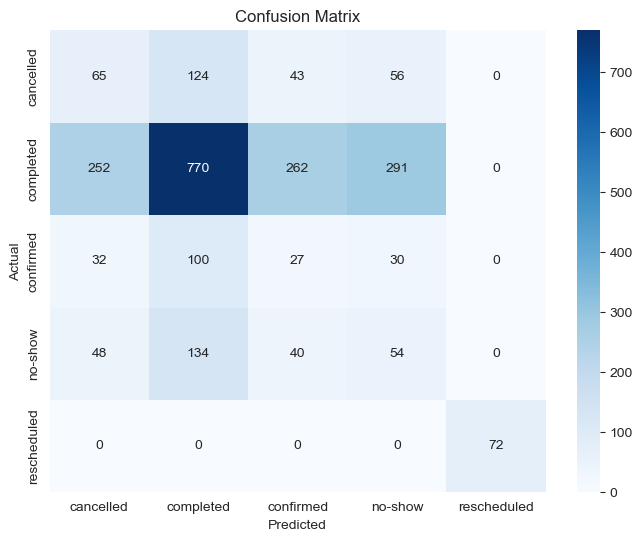

In [7]:
# --- 1. Make Predictions ---
y_pred = model.predict(X_test)

# --- 2. Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# --- 3. Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=raw_data[target].cat.categories))

# --- 4. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=raw_data[target].cat.categories, 
            yticklabels=raw_data[target].cat.categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
import joblib
import os

# Define a path to save the model
model_path = "appointment_status_model2.pkl"

# Save the model
joblib.dump(model, model_path)
print(f"Model saved successfully at: {os.path.abspath(model_path)}")


Model saved successfully at: C:\Users\Hp\Desktop\datasci_fakenew\Prajwal Bawankar Models\1_in_all_project_21_aug_2025\smart appointment\appointme\New folder\appointment_status_model2.pkl


In [13]:
# Load the saved model
loaded_model = joblib.load("appointment_status_model2.pkl")

# Example prediction
y_pred_loaded = loaded_model.predict(X_test)
print("Accuracy with loaded model:", accuracy_score(y_test, y_pred_loaded))


Accuracy with loaded model: 0.4116666666666667


✅ Model saved as gradient_boosting_model.pkl
Test Accuracy: 0.6671

Classification Report:

              precision    recall  f1-score   support

   cancelled       0.06      0.01      0.01       288
   completed       0.68      0.97      0.80      1575
   confirmed       0.00      0.00      0.00       189
     no-show       0.14      0.01      0.03       276
 rescheduled       1.00      1.00      1.00        72

    accuracy                           0.67      2400
   macro avg       0.38      0.40      0.37      2400
weighted avg       0.50      0.67      0.56      2400



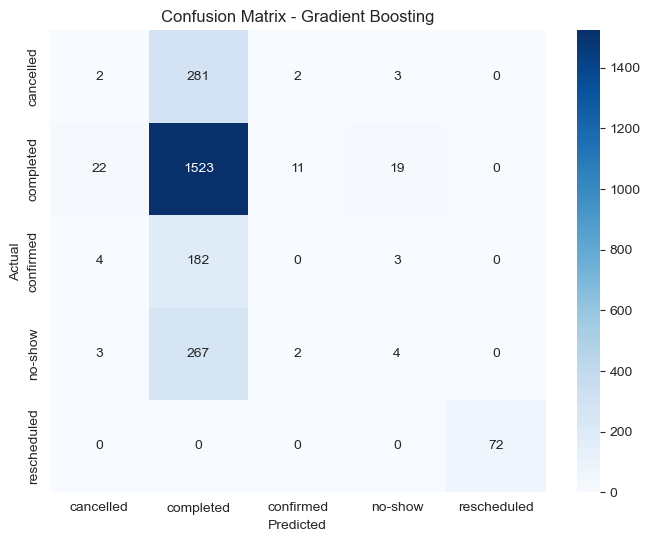

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# --- Train Gradient Boosting Model ---
gb_model = GradientBoostingClassifier(
    n_estimators=200,      # number of boosting stages
    learning_rate=0.1,     # step size shrinkage
    max_depth=5,           # max depth of each tree
    random_state=42
)

gb_model.fit(X_train, y_train)

# --- Save the model ---
model_filename = "gradient_boosting_model.pkl"
joblib.dump(gb_model, model_filename)
print(f"✅ Model saved as {model_filename}")

# --- Load the model (for future use) ---
loaded_model = joblib.load(model_filename)

# --- Evaluate ---
y_pred = loaded_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=raw_data[target].cat.categories))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=raw_data[target].cat.categories,
            yticklabels=raw_data[target].cat.categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


In [15]:
import joblib
import numpy as np

# --- Load model ---
model_filename = "gradient_boosting_model.pkl"
gb_model = joblib.load(model_filename)
print(f"✅ Model loaded from {model_filename}")

# --- Define feature order ---
features = ['lead_time_minutes', 'reschedule_count', 'channel_enc', 'service_type_enc',
            'holiday_flag', 'weather_enc', 'tags_enc']

# --- Example category mappings (replace with your dataset categories) ---
channel_map = {"Online": 0, "Phone": 1, "In-Person": 2}
service_type_map = {"Consultation": 0, "Follow-up": 1, "Emergency": 2}
weather_map = {"Sunny": 0, "Rainy": 1, "Cloudy": 2, "Storm": 3}
tags_map = {"New": 0, "Returning": 1, "VIP": 2, "Other": 3}

def get_user_input():
    print("\n📌 Enter details for prediction:")

    lead_time_minutes = int(input("Lead time in minutes: "))
    reschedule_count = int(input("Number of reschedules: "))

    # --- Channel ---
    print("\nChoose Channel:")
    for k, v in channel_map.items():
        print(f"{v}: {k}")
    channel_enc = int(input("Enter option number: "))

    # --- Service Type ---
    print("\nChoose Service Type:")
    for k, v in service_type_map.items():
        print(f"{v}: {k}")
    service_type_enc = int(input("Enter option number: "))

    # --- Holiday Flag ---
    print("\nHoliday? 0: No, 1: Yes")
    holiday_flag = int(input("Enter option number: "))

    # --- Weather ---
    print("\nChoose Weather:")
    for k, v in weather_map.items():
        print(f"{v}: {k}")
    weather_enc = int(input("Enter option number: "))

    # --- Tags ---
    print("\nChoose Tags:")
    for k, v in tags_map.items():
        print(f"{v}: {k}")
    tags_enc = int(input("Enter option number: "))

    return [lead_time_minutes, reschedule_count, channel_enc,
            service_type_enc, holiday_flag, weather_enc, tags_enc]

# --- Predict ---
user_data = np.array(get_user_input()).reshape(1, -1)
prediction = gb_model.predict(user_data)[0]

# Map prediction back to original label
target_class = raw_data[target].cat.categories[prediction]
print(f"\n✅ Predicted Status: {target_class}")


✅ Model loaded from gradient_boosting_model.pkl

📌 Enter details for prediction:


Lead time in minutes:  32
Number of reschedules:  0



Choose Channel:
0: Online
1: Phone
2: In-Person


Enter option number:  1



Choose Service Type:
0: Consultation
1: Follow-up
2: Emergency


Enter option number:  1



Holiday? 0: No, 1: Yes


Enter option number:  1



Choose Weather:
0: Sunny
1: Rainy
2: Cloudy
3: Storm


Enter option number:  1



Choose Tags:
0: New
1: Returning
2: VIP
3: Other


Enter option number:  1



✅ Predicted Status: confirmed


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
